In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.spatial import distance_matrix
%matplotlib inline

In [34]:
df = pd.read_csv('Mall_Customers.csv')

In [35]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


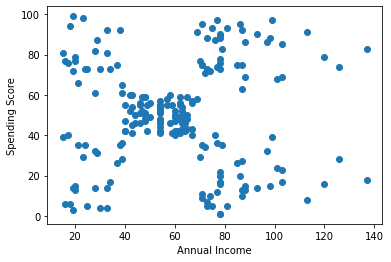

In [36]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)']);
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show();

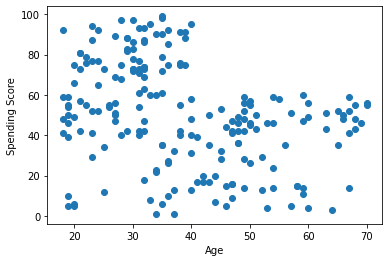

In [37]:
plt.scatter(df['Age'], df['Spending Score (1-100)']);
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show();

### Model 1

In [38]:
df_new = df.iloc[: , 3 :]

In [39]:
df_new

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


<ipython-input-40-e3ba83bfacc3>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link_m = linkage(dist_m)


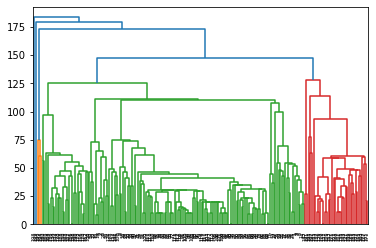

In [40]:
dist_m = pd.DataFrame(distance_matrix(df_new.values, df_new.values))
link_m = linkage(dist_m)
dendrogram(link_m, orientation = 'top')
plt.show();

In [41]:
AC = AgglomerativeClustering(n_clusters = 5)
model = AC.fit(df_new)
df_new['Label'] = model.labels_

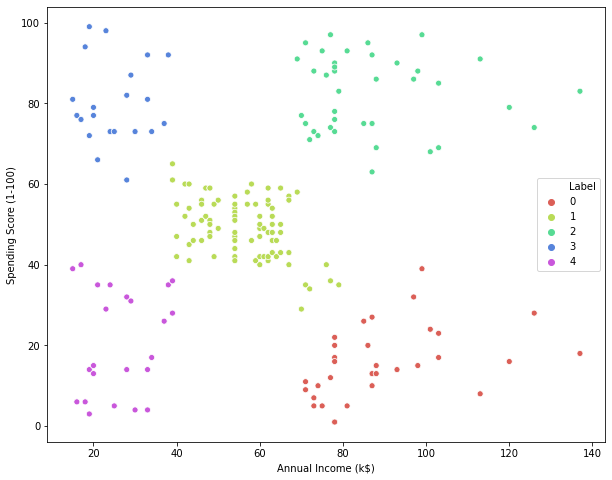

In [42]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df_new, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = df_new['Label'], palette = sns.color_palette('hls', 5));

### Model 2

In [43]:
df_new_2 = mall_c[['Age', 'Spending Score (1-100)']]

In [44]:
df_new_2

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


<ipython-input-45-df7debca7491>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link_m2 = linkage(dist_m2)


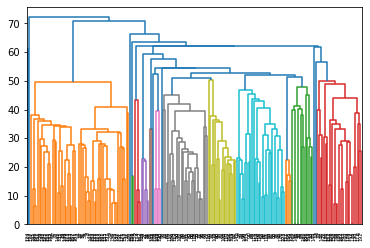

In [45]:
dist_m2 = pd.DataFrame(distance_matrix(df_new_2.values, df_new_2.values))
link_m2 = linkage(dist_m2)
dendrogram(link_m2, orientation = 'top')
plt.show();

In [46]:
AC2 = AgglomerativeClustering(n_clusters = 4)
model2 = AC2.fit(df_new_2)
df_new_2['Label'] = model2.labels_

<ipython-input-46-c82cec271458>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_2['Label'] = model2.labels_


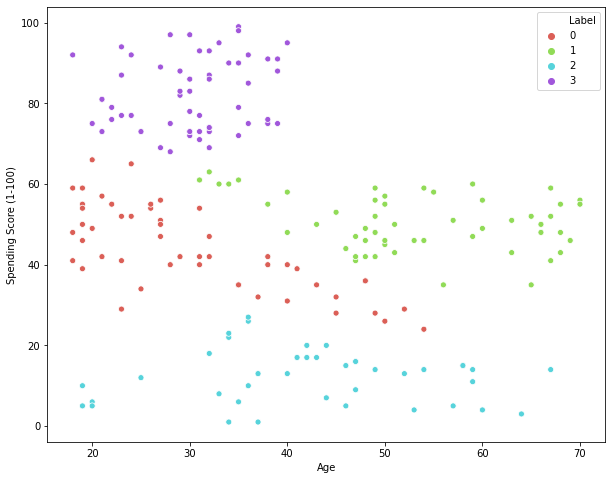

In [47]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df_new_2, x = 'Age', y = 'Spending Score (1-100)', hue = df_new_2['Label'], palette = sns.color_palette('hls', 4));